# Project Brief: Epidemic Modelling

## Background

In this project you will develop a simulation which models the spread of a viral infection through a population. The individuals in the population area divided into various states which describe their exposure to the virus such as as Suscepible (S), Infected (I) and Recovered (R). Individuals in the population are assumed to be distributed in a grid of cells which might represent a geographical area such as a city or country, and as the simulation progresses, individuals transition between states according to probabilistic rules (see {numref}`fig_project_epidemic`).

```{figure} https://upload.wikimedia.org/wikipedia/commons/a/a6/SIR_model_simulated_using_python.gif
---
height: 300px
name: fig_project_epidemic
---
A spatial epdidemic model. The colour of each cell represents its state of infection. *[From Wikipedia]*.
```

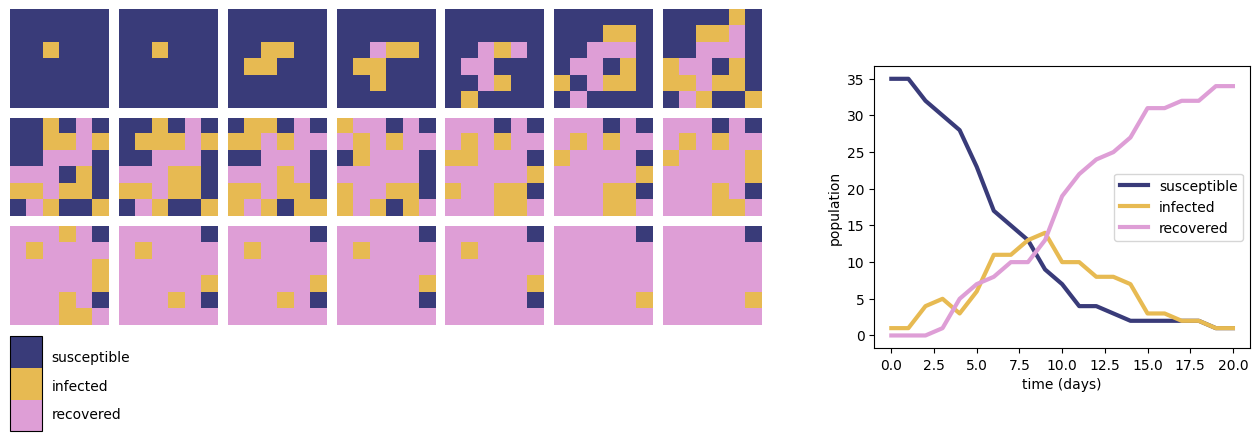

In [1]:
import epidemics as ep
import numpy as np
from myst_nb import glue

N = 8
p = 0.25
q = 0.25

num = 21

grid = np.zeros((N, N))
grid[3, 3] = 1

np.random.seed(0)

grid_all = ep.run_simulation(N, p, q, num, grid)

fig = ep.plot_figures(grid_all[:,1:-1,1:-1], 7, 3)
glue("epidemic_fig", fig, display=False)
#fig = plot_totals(grid_all[:,1:-1,1:-1], 3)


## SIR Model

{numref}`epidemic_fig` shows the results of a simple SIR model of infection on a 6 by 6 grid. Each cell represents an individual in one of three states: Susceptible (S), Infected (I) or Recovered (R). Initially all cells are in the susceptible state except one infected individual. At each timestep, each cell changes state according to the following rules:

- A cell in state S which has at least one neighbouring cell in state I changes to state I with probability $p=0.25$, otherwise remains in state S;
- A cell in state I changes to state R with probability $q=0.25$, otherwise remains in state I;
- A cell in state R remains in state R.

In this simulation, we use the definition of a [Moore neighbourhood](https://en.wikipedia.org/wiki/Moore_neighborhood) consisting of a cell and each of its eight immediate surrounding neighbours.

```{glue:figure} epidemic_fig
:figwidth: 800px
:name: epidemic_fig

This is a **caption**
```

## SEIQR Model

A more sophisticated model of infection might include more states and more complicated update rules such as the SEIQR model which extends the SIR model to include Exposed (E) and Quarantined (Q) states and time-dependent update rules {cite}`ghosh2021computational`.

|State|Description|
|---|---|
|S|Susceptible|
|E|Exposed and asymptomatically infected|
|I|Infected, but not yet quarantined|
|Q|Quarantined|
|R|Recovered|

```{figure} SEIQR.png
---
height: 100px
name: fig_project_epidemic_SEIQR
---
The state transitions in the SEIQR epidemic model. Reprinted from {cite}`ghosh2021computational`.
```

## Starter Code

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# This function takes an n x n array and returns
# a new array after applying the state transition rules
def advance(grid, n, p):
    result = np.zeros((n, n))
    # loop over all cells in grid (except border cells)
    for i in range(1, n-1):
        for j in range(1, n-1):
            # determine the number of infected neighbours of cell i,j
            num_infected_neighbours = np.sum(grid[i-1:i+2,j-1:j+2] == 1)
            # if cell i,j is susceptible and has at least one infected neighbour,
            # it becomes infected with probability p
            if grid[i,j] == 0:
                if num_infected_neighbours > 0 and np.random.rand() < p:
                    result[i,j] = 1
                else:
                    result[i,j] = 0
            # if cell i,j is infected it remains infected
            elif grid[i,j] == 1:
                result[i,j] = 1
    return result

# run simulation

grid = np.zeros((5,5))
grid[2,2] = 1
print("Initial state\n", grid)
for i in range(5):
    grid = advance(grid, 5, 0.2)
    print("Iteration", i + 1 , "\n",  grid)

Initial state
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Iteration 0 
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Iteration 1 
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Iteration 2 
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]
Iteration 3 
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]
Iteration 4 
 [[0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]


## References

```{bibliography}
```